In [1]:
import os
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import seaborn as sns

from scipy.stats import pearsonr

sns.set_style("darkgrid")
np.random.seed(930525)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 200)

warnings.simplefilter('once')

%matplotlib inline
%load_ext watermark
%watermark --iversions

pandas  1.1.4
seaborn 0.10.1
numpy   1.19.5



In [4]:
import plot_utils as pu
pu.figure_setup()
clf_name = "rf_feature_selection_et"

/home/bhillmann/.conda/envs/type_1/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
from glob import glob

import joblib

clf_model = joblib.load("../data/clf.sklearn.all.rf_feature_selection_et.pkl")
clf_log = joblib.load("../data/clf.logistic.all.rf_feature_selection_et.pkl")

In [6]:
X_train, y_train, X_test, y_test = joblib.load("../data/data.pkl")

/home/bhillmann/.conda/envs/type_1/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# X_transf = clf['variancethreshold'].transform(X_test)

# X_transf = pd.DataFrame(X_transf, columns=[X_test.columns[i] for i in range(len(X_test.columns)) if clf['variancethreshold'].get_support()[i]])

In [7]:
# X_transf.shape

In [ ]:
# X_transf = pd.DataFrame(clf['zerocount'].transform(X_test), columns=["num_zeroes", "num_nonzeroes"] + list(X_test.columns))

In [8]:
X_transf = pd.DataFrame(clf_model['rfecv'].transform(X_test), columns=[X_test.columns[i] for i in range(len(X_test.columns)) if clf_model['rfecv'].get_support()[i]])

In [9]:
import shap

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.TreeExplainer(clf_model["extratreesclassifier"])

/home/bhillmann/.conda/envs/type_1/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
pred = clf_model["extratreesclassifier"].predict_proba(X_transf)[:, 0]

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
# np.abs(shap_values.sum(1) + explainer.expected_value - pred).max()

In [11]:
shap_values = explainer.shap_values(X_transf)

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [12]:
shap_obj = explainer(X_transf)

In [ ]:
# shap.plots.su(shap_obj, plot_type="compact_dot")

In [13]:
shap_values

[array([[-3.79243331e-01, -6.67392742e-02, -1.09917772e-01, ...,
         -1.07776613e-02, -5.34423377e-05,  1.88357795e-03],
        [ 1.85888355e-02,  6.78493228e-04,  5.06809692e-03, ...,
          6.99827326e-04, -1.25893613e-03, -9.11642180e-04],
        [ 5.71466772e-02,  6.96998012e-03,  9.59211877e-03, ...,
          3.13542046e-03, -1.33337323e-03, -6.42777120e-04],
        ...,
        [ 1.85484148e-02,  2.79184120e-03,  6.21993200e-03, ...,
         -1.16779201e-03, -4.57920101e-04,  3.20808832e-05],
        [ 1.78746513e-02,  2.57965537e-03,  6.17704104e-03, ...,
         -3.61047774e-04,  4.62598214e-04,  1.75803169e-04],
        [ 1.84154738e-02,  2.74206258e-03,  6.25295613e-03, ...,
         -1.30658632e-03, -7.84134207e-05, -1.07090717e-04]]),
 array([[ 3.79243331e-01,  6.67392742e-02,  1.09917772e-01, ...,
          1.07776613e-02,  5.34423377e-05, -1.88357795e-03],
        [-1.85888355e-02, -6.78493228e-04, -5.06809692e-03, ...,
         -6.99827326e-04,  1.25893613e

<Figure size 2100x1400 with 0 Axes>

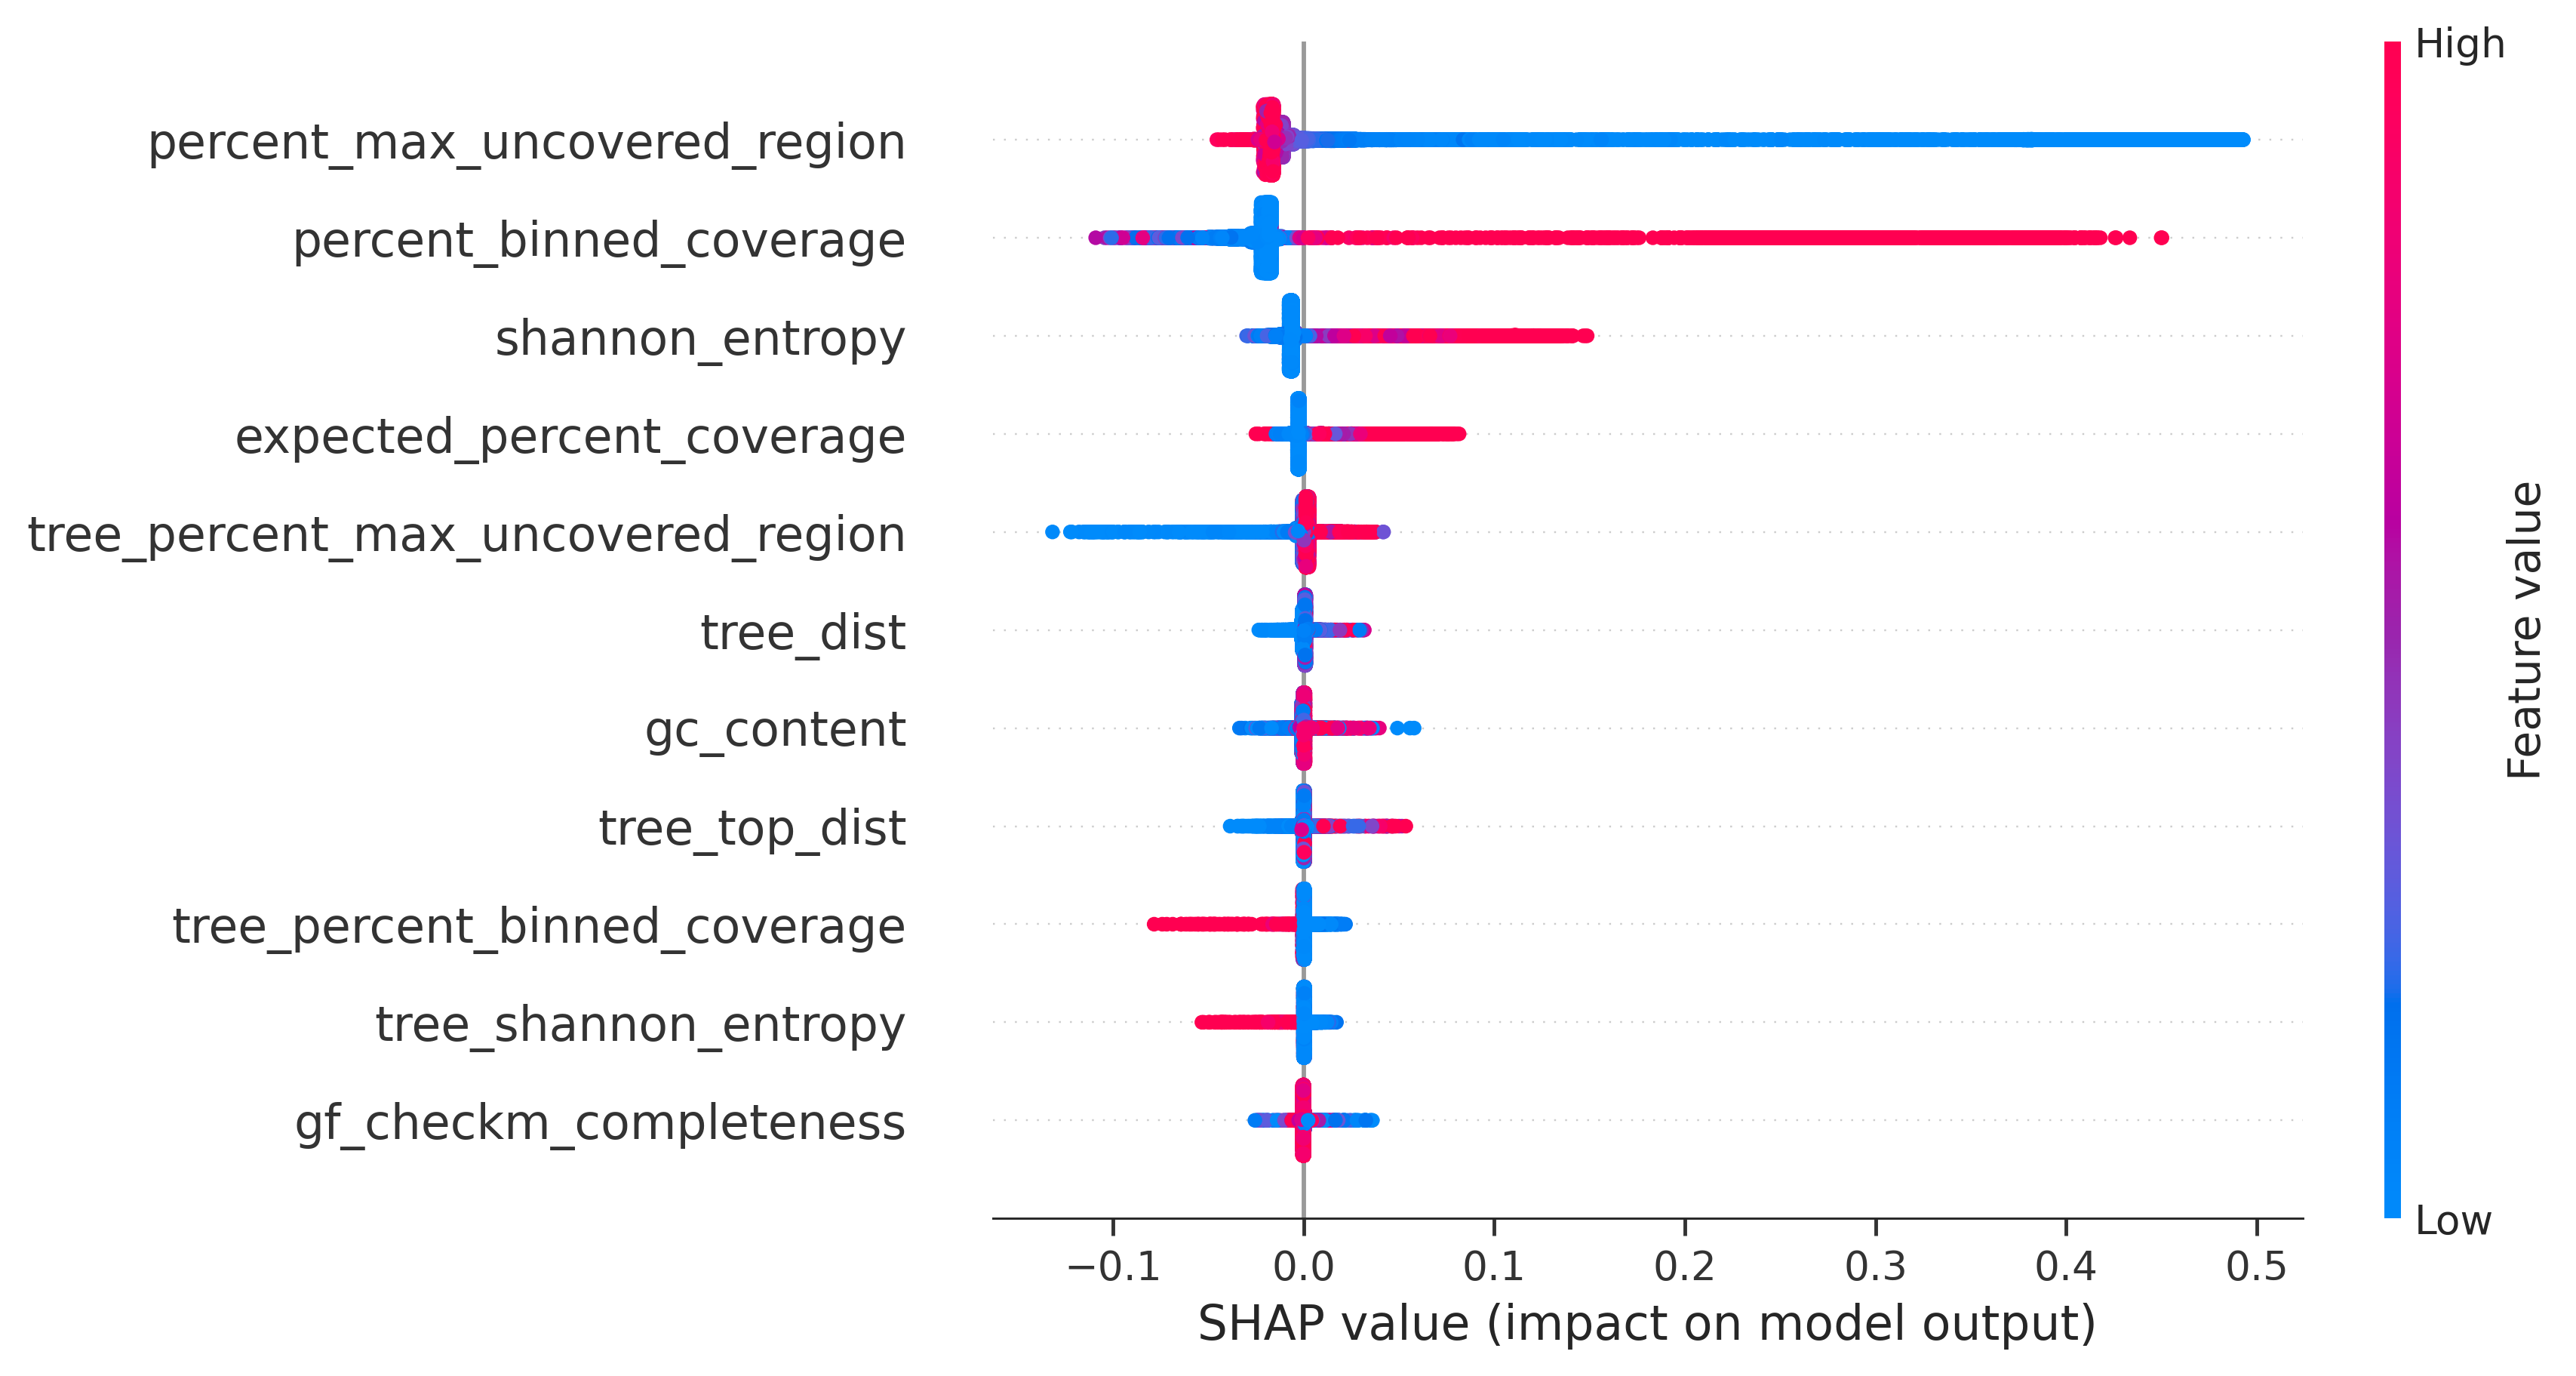

AttributeError: 'FigureManagerBase' object has no attribute 'axes'

<Figure size 2100x1400 with 0 Axes>

In [23]:
fig_size = pu.get_fig_size(10, 10)
fig, ax = plt.subplots(figsize=fig_size)
shap.summary_plot(shap_values[1], X_transf)

fig = plt.gcf()
ax = plt.gca()
pu.stylize_axes(ax)
pu.stylize_fig(fig)
plt.tight_layout()

pu.save_plot(fig, f"shap_summary")


In [ ]:
shap_obj.values[:, :, 1]

In [ ]:
shap_obj.base_values[:, 1]

In [ ]:
import copy
shap_obj_copy = copy.deepcopy(shap_obj)

In [ ]:
shap_obj_copy.values = shap_obj.values[:, :, 1]
shap_obj_copy.base_values = shap_obj.base_values[:, 1]

In [ ]:
shap.plots.bar(shap_obj_copy)

In [ ]:
shap.decision_plot(explainer.expected_value[1], shap_values[1][:2, :], X_transf.iloc[:2, :], link='logit')

In [ ]:
shap.decision_plot(explainer.expected_value[1], shap_obj[0, :][:,1].values, link='logit')

In [ ]:
shap_obj[0][1]

In [ ]:
shap_obj[:, 1][:, 1]

In [ ]:
y_pred = (shap_values[1].sum(1) + explainer.expected_value[1]) > 0

In [ ]:
(y_test == True) & (y_pred == True)

In [ ]:
shap.plots.waterfall(shap_obj[0, :][:,1])

In [ ]:
fig, ax = plt.subplots()

shap.dependence_plot("percent_binned_coverage", shap_values[1], X_transf, interaction_index = "expected_percent_coverage")

pu.save_plot(fig, f"shap.percent_binned_coverage.expected_percent_coverage")

In [ ]:
fig_size = (5.5, 4)
fig, ax = plt.subplots(figsize=fig_size)

colors = np.repeat('tp', len(y_test))

colors[y_pred & y_test] = 'TP'
colors[~y_pred & ~y_test] = 'TN'
colors[y_pred & ~y_test] = 'FP'
colors[~y_pred & y_test] = 'FN'

mask = (colors == 'FP') | (colors == 'FN')

sns.scatterplot(values.data, values.values, hue=colors, alpha=.6, x_jitter='auto', ax=ax)
# ax = sns.scatterplot(values.data[~mask], values.values[~mask], hue=colors[~mask], alpha=.6, x_jitter='auto')

ax.set_xlabel("percent_binned_coverage")
ax.set_ylabel("SHAP value for percent_binned_coverage")

pu.save_plot(fig, f"shap.percent_binned_coverage.accuracy")

In [ ]:
fig, ax = plt.subplots()

sns.boxplot(colors, values.values, ax=ax)
ax.set_ylabel("SHAP value for percent_binned_coverage")

pu.save_plot(fig, f"shap.percent_binned_coverage.boxplot")

In [ ]:
fig, ax = plt.subplots()

values = shap_obj[:, 0][:, 1]

colors = np.log10(pd.to_numeric(X_test["hits"]))
colors = colors / colors.max()
norm = plt.Normalize(vmin=0, vmax=colors.max())
cmap = plt.cm.viridis

sns.scatterplot(values.data, values.values, hue=colors, palette='cividis', alpha=.6, x_jitter='auto', ax=ax)

norm = plt.Normalize(colors.min(), colors.max())
sm = plt.cm.ScalarMappable(cmap="cividis", norm=norm)
sm.set_array([])

# Remove the legend and add a colorbar
ax.get_legend().remove()
artists = ax.figure.colorbar(sm, label="$log_{10}(hits)$")

ax.set_xlabel("percent_binned_coverage")
ax.set_ylabel("SHAP value for percent_binned_coverage")

pu.save_plot(fig, f"shap_plot.percent_binned_coverage.hits")

In [ ]:
rfecv = clf_model['rfecv']

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
fig, ax = plt.subplots()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(5,
               len(rfecv.grid_scores_) + 5),
         rfecv.grid_scores_)

pu.stylize_axes(ax)
pu.stylize_fig(fig)
plt.tight_layout()

pu.save_plot(fig, f"rfcev.{clf_name}")

In [ ]:
from sklearn.metrics import precision_score, recall_score, average_precision_score

In [ ]:
X_transf.columns

In [ ]:
feature_name = "percent_coverage"

precisions = []
recalls = []
average_precison_scores = []

precisions_log = []
recalls_log = []
average_precison_scores_log = []

y_pred = clf_model.predict(X_test)
y_pred_log = clf_log.predict(X_test[["relative_abundance"]])

thresholds = np.arange(.01, 1., .01)
for threshold in thresholds:
    mask = X_test[feature_name] < threshold
    
    precisions.append(precision_score(y_test[mask], y_pred[mask]))
    recalls.append(recall_score(y_test[mask], y_pred[mask]))
    average_precison_scores.append(average_precision_score(y_test[mask], y_pred[mask]))
    
    precisions_log.append(precision_score(y_test[mask], y_pred_log[mask]))
    recalls_log.append(recall_score(y_test[mask], y_pred_log[mask]))
    average_precison_scores_log.append(average_precision_score(y_test[mask], y_pred_log[mask]))

In [ ]:
feature_name = "relative_abundance"
max_thresh = .001
n_bins = 20
mask = X_test[feature_name] < max_thresh

X_test_clean = X_test.copy()

data = X_test.loc[mask, feature_name]
X_mask = X_test.loc[mask, :].copy()
hist, bins = np.histogram(data, bins=n_bins)
X_mask.loc[:, 'bin'] = np.digitize(data, bins)

X_mask["truth"] = y_test.loc[mask]
X_mask['pred'] = y_pred[mask]
X_mask['pred_log'] = y_pred_log[mask]

average_precision_scores = []
average_precision_scores_log = []

for name, df in X_mask.groupby('bin'):
    average_precision_scores.append(average_precision_score(df["truth"], df["pred"]))
    average_precision_scores_log.append(average_precision_score(df["truth"], df["pred_log"]))
    
cumulative_average_precision_scores = []
cumulative_average_precision_scores_log = []

for threshold in bins[1:]:
    try:
        _mask = X_mask[feature_name] <= threshold
        cumulative_average_precision_scores.append(average_precision_score(X_mask.loc[_mask, "truth"], X_mask.loc[_mask, "pred"]))
        cumulative_average_precision_scores_log.append(average_precision_score(X_mask.loc[_mask, "truth"], X_mask.loc[_mask, "pred_log"]))
    except BaseException as e:
#         cumulative_average_precision_scores.append(np.nan)
        continue
cumulative_average_precision_scores.append(average_precision_score(X_mask["truth"], X_mask["pred"]))
cumulative_average_precision_scores_log.append(average_precision_score(X_mask["truth"], X_mask["pred_log"]))


bins_ = np.append(bins, max_thresh)


import matplotlib.lines as mlines
import matplotlib.patches as mpatches

fig, ax = plt.subplots()
ax.set_ylabel('frequency')
ax.set_xlabel(feature_name)
plt.hist([X_test.loc[mask & y_test, feature_name], X_test.loc[mask & ~y_test, feature_name]], bins=20, stacked=True, density=True)
plt.semilogy()

# Creating Twin axes for dataset_1
ax2 = ax.twinx()

ax2.plot((bins_[1:] + bins_[:-1]) / 2, cumulative_average_precision_scores, marker="+", color="black", label="cumulative AP")
ax2.plot((bins_[1:] + bins_[:-1]) / 2, cumulative_average_precision_scores_log, marker="+", color="navy", label="cumulative Baseline AP")

ax2.plot((bins_[1:] + bins_[:-1]) / 2, average_precision_scores, marker="o", color="grey", mfc="white", label="AP")
ax2.plot((bins_[1:] + bins_[:-1]) / 2, average_precision_scores_log, marker="o", color="purple", mfc="white", label="Baseline AP")

ax2.set_ylabel("test")

red_patch = mpatches.Patch(color='r', label='absent')
blue_patch =  mpatches.Patch(color='b', label='present')

c_ap = mlines.Line2D([],[], marker="+", color="black", label="cumulative AP")
c_ap_log = mlines.Line2D([],[], marker="+", color="navy", label="cumulative Baseline AP")

ap = mlines.Line2D([], [], marker="o", color="grey", mfc="white", label="AP")
ap_log = mlines.Line2D([], [], marker="o", color="purple", mfc="white", label="Baseline AP")

_artists = ax2.legend(loc='center left', bbox_to_anchor=(1.2, 0.5), handles=[red_patch, blue_patch, c_ap, ap, c_ap_log, ap_log])

pu.save_plot(fig, f"feature_interaction.{feature_name}", artists=(_artists,))

In [ ]:
feature_name = "hits"
max_thresh = 2_000
n_bins = 20
mask = X_test[feature_name] < max_thresh

X_test_clean = X_test.copy()

data = X_test.loc[mask, feature_name]
X_mask = X_test.loc[mask, :].copy()
hist, bins = np.histogram(data, bins=n_bins)
X_mask.loc[:, 'bin'] = np.digitize(data, bins)

X_mask["truth"] = y_test.loc[mask]
X_mask['pred'] = y_pred[mask]
X_mask['pred_log'] = y_pred_log[mask]

average_precision_scores = []
average_precision_scores_log = []

for name, df in X_mask.groupby('bin'):
    average_precision_scores.append(average_precision_score(df["truth"], df["pred"]))
    average_precision_scores_log.append(average_precision_score(df["truth"], df["pred_log"]))
    
cumulative_average_precision_scores = []
cumulative_average_precision_scores_log = []

for threshold in bins[1:]:
    try:
        _mask = X_mask[feature_name] <= threshold
        cumulative_average_precision_scores.append(average_precision_score(X_mask.loc[_mask, "truth"], X_mask.loc[_mask, "pred"]))
        cumulative_average_precision_scores_log.append(average_precision_score(X_mask.loc[_mask, "truth"], X_mask.loc[_mask, "pred_log"]))
    except BaseException as e:
#         cumulative_average_precision_scores.append(np.nan)
        continue
cumulative_average_precision_scores.append(average_precision_score(X_mask["truth"], X_mask["pred"]))
cumulative_average_precision_scores_log.append(average_precision_score(X_mask["truth"], X_mask["pred_log"]))


bins_ = np.append(bins, max_thresh)


import matplotlib.lines as mlines
import matplotlib.patches as mpatches

fig, ax = plt.subplots()
ax.set_ylabel('frequency')
ax.set_xlabel(feature_name)
plt.hist([X_test.loc[mask & y_test, feature_name], X_test.loc[mask & ~y_test, feature_name]], bins=20, stacked=True, density=False)
plt.semilogy()

# Creating Twin axes for dataset_1
ax2 = ax.twinx()

ax2.plot((bins_[1:] + bins_[:-1]) / 2, cumulative_average_precision_scores, marker="+", color="black", label="cumulative ML AP")
ax2.plot((bins_[1:] + bins_[:-1]) / 2, cumulative_average_precision_scores_log, marker="+", color="navy", label="cumulative Baseline AP")

ax2.plot((bins_[1:] + bins_[:-1]) / 2, average_precision_scores, marker="o", color="grey", mfc="white", label="ML AP")
ax2.plot((bins_[1:] + bins_[:-1]) / 2, average_precision_scores_log, marker="o", color="purple", mfc="white", label="Baseline AP")

# ax2.set_ylabel("test")

red_patch = mpatches.Patch(color='r', label='absent')
blue_patch =  mpatches.Patch(color='b', label='present')

c_ap = mlines.Line2D([],[], marker="+", color="black", label="cumulative ML AP")
c_ap_log = mlines.Line2D([],[], marker="+", color="navy", label="cumulative Baseline AP")

ap = mlines.Line2D([], [], marker="o", color="grey", mfc="white", label="ML AP")
ap_log = mlines.Line2D([], [], marker="o", color="purple", mfc="white", label="Baseline AP")

# _artists = ax2.legend(loc='center left', bbox_to_anchor=(1.2, 0.5), handles=[red_patch, blue_patch, c_ap, ap, c_ap_log, ap_log])

pu.save_plot(fig, f"feature_interaction.{feature_name}")

In [ ]:
feature_name = "percent_binned_coverage"
max_thresh = .2 
n_bins = 20
mask = X_test[feature_name] < max_thresh

X_test_clean = X_test.copy()

data = X_test.loc[mask, feature_name]
X_mask = X_test.loc[mask, :].copy()
hist, bins = np.histogram(data, bins=n_bins)
X_mask.loc[:, 'bin'] = np.digitize(data, bins)

X_mask["truth"] = y_test.loc[mask]
X_mask['pred'] = y_pred[mask]
X_mask['pred_log'] = y_pred_log[mask]

average_precision_scores = []
average_precision_scores_log = []

for name, df in X_mask.groupby('bin'):
    average_precision_scores.append(average_precision_score(df["truth"], df["pred"]))
    average_precision_scores_log.append(average_precision_score(df["truth"], df["pred_log"]))
    
cumulative_average_precision_scores = []
cumulative_average_precision_scores_log = []

for threshold in bins[1:]:
    try:
        _mask = X_mask[feature_name] <= threshold
        cumulative_average_precision_scores.append(average_precision_score(X_mask.loc[_mask, "truth"], X_mask.loc[_mask, "pred"]))
        cumulative_average_precision_scores_log.append(average_precision_score(X_mask.loc[_mask, "truth"], X_mask.loc[_mask, "pred_log"]))
    except BaseException as e:
#         cumulative_average_precision_scores.append(np.nan)
        continue
cumulative_average_precision_scores.append(average_precision_score(X_mask["truth"], X_mask["pred"]))
cumulative_average_precision_scores_log.append(average_precision_score(X_mask["truth"], X_mask["pred_log"]))


bins_ = np.append(bins, max_thresh)


import matplotlib.lines as mlines
import matplotlib.patches as mpatches

fig, ax = plt.subplots()
# ax.set_ylabel('frequency')
ax.set_xlabel(feature_name)
plt.hist([X_test.loc[mask & y_test, feature_name], X_test.loc[mask & ~y_test, feature_name]], bins=20, stacked=True, density=False)
plt.semilogy()

# Creating Twin axes for dataset_1
ax2 = ax.twinx()

ax2.plot((bins_[1:] + bins_[:-1]) / 2, cumulative_average_precision_scores, marker="+", color="black", label="cumulative ML AP")
ax2.plot((bins_[1:] + bins_[:-1]) / 2, cumulative_average_precision_scores_log, marker="+", color="navy", label="cumulative Baseline AP")

ax2.plot((bins_[1:] + bins_[:-1]) / 2, average_precision_scores, marker="o", color="grey", mfc="white", label="ML AP")
ax2.plot((bins_[1:] + bins_[:-1]) / 2, average_precision_scores_log, marker="o", color="purple", mfc="white", label="Baseline AP")

ax2.set_ylabel("metric")

red_patch = mpatches.Patch(color='orange', label='absent')
blue_patch =  mpatches.Patch(color='b', label='present')

c_ap = mlines.Line2D([],[], marker="+", color="black", label="cumulative ML AP")
c_ap_log = mlines.Line2D([],[], marker="+", color="navy", label="cumulative Baseline AP")

ap = mlines.Line2D([], [], marker="o", color="grey", mfc="white", label="ML AP")
ap_log = mlines.Line2D([], [], marker="o", color="purple", mfc="white", label="Baseline AP")

_artists = ax2.legend(loc='center left', bbox_to_anchor=(1.2, 0.5), handles=[red_patch, blue_patch, c_ap, ap, c_ap_log, ap_log])

pu.save_plot(fig, f"feature_interaction.{feature_name}", artists=(_artists,))

In [ ]:
sns.set(context="paper", style="ticks", palette="colorblind", font='serif', font_scale=1.5, color_codes=True, rc=pu.figure_setup())

ax.yaxis.grid(True)
ax.xaxis.grid(False)
fig_size = pu.get_fig_size(15, 10)

latex_feature_name = feature_name.replace("_", " ")

fig, ax = plt.subplots(figsize=fig_size)
ax.plot(thresholds, recalls, color="b", alpha=.8, lw=2, label="ML Model")
ax.plot(thresholds, recalls_log, color="r", alpha=.8, lw=2, label="Baseline Model")

ax.set_ylabel("recall")
ax.set_xlabel(f"{latex_feature_name} threshold")

pu.stylize_axes(ax)
pu.stylize_fig(fig)
plt.tight_layout()

artists = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
artists.set_frame_on(False)

pu.save_plot(fig, f"recall.test.{clf_name}.{feature_name}", artists=(artists,))

fig, ax = plt.subplots(figsize=fig_size)
ax.plot(thresholds, precisions, color="b", alpha=.8, lw=2, label="ML Model")
ax.plot(thresholds, precisions_log, color="r", alpha=.8, lw=2, label="Baseline Model")

ax.set_ylabel("precision")
ax.set_xlabel((f"{latex_feature_name} threshold"))

pu.stylize_axes(ax)
pu.stylize_fig(fig)
plt.tight_layout()

artists = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
artists.set_frame_on(False)

pu.save_plot(fig, f"precision.test.{clf_name}.{feature_name}", artists=(artists,))

fig, ax = plt.subplots(figsize=fig_size)
ax.plot(thresholds, average_precison_scores, color="b", alpha=.8, lw=2, label="ML Model")
ax.plot(thresholds, average_precison_scores_log, color="r", alpha=.8, lw=2, label="Baseline Model")

ax.set_ylabel("average precision")
ax.set_xlabel((f"{latex_feature_name} threshold"))

pu.stylize_axes(ax)
pu.stylize_fig(fig)
plt.tight_layout()

artists = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
artists.set_frame_on(False)
pu.save_plot(fig, f"ap.test.{clf_name}.{feature_name}", artists=(artists,))


In [ ]:
feature_name = "relative_abundance"

precisions = []
recalls = []
average_precison_scores = []

precisions_log = []
recalls_log = []
average_precison_scores_log = []

y_pred = clf_model.predict(X_test)
y_pred_log = clf_log.predict(X_test[["relative_abundance"]])

thresholds = np.arange(.01, 1., .01)
for threshold in thresholds:
    mask = X_test[feature_name] < threshold
    
    precisions.append(precision_score(y_test[mask], y_pred[mask]))
    recalls.append(recall_score(y_test[mask], y_pred[mask]))
    average_precison_scores.append(average_precision_score(y_test[mask], y_pred[mask]))
    
    precisions_log.append(precision_score(y_test[mask], y_pred_log[mask]))
    recalls_log.append(recall_score(y_test[mask], y_pred_log[mask]))
    average_precison_scores_log.append(average_precision_score(y_test[mask], y_pred_log[mask]))

In [ ]:
sns.set(context="paper", style="ticks", palette="colorblind", font='serif', font_scale=1.5, color_codes=True, rc=pu.figure_setup())

ax.yaxis.grid(True)
ax.xaxis.grid(False)
fig_size = pu.get_fig_size(15, 10)

latex_feature_name = feature_name.replace("_", " ")

fig, ax = plt.subplots(figsize=fig_size)
ax.plot(thresholds, recalls, color="b", alpha=.8, lw=2, label="ML Model")
ax.plot(thresholds, recalls_log, color="r", alpha=.8, lw=2, label="Baseline Model")

ax.set_ylabel("recall")
ax.set_xlabel(f"{latex_feature_name} threshold")

pu.stylize_axes(ax)
pu.stylize_fig(fig)
plt.tight_layout()

artists = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
artists.set_frame_on(False)

pu.save_plot(fig, f"recall.test.{clf_name}.{feature_name}", artists=(artists,))

fig, ax = plt.subplots(figsize=fig_size)
ax.plot(thresholds, precisions, color="b", alpha=.8, lw=2, label="ML Model")
ax.plot(thresholds, precisions_log, color="r", alpha=.8, lw=2, label="Baseline Model")

ax.set_ylabel("precision")
ax.set_xlabel((f"{latex_feature_name} threshold"))

pu.stylize_axes(ax)
pu.stylize_fig(fig)
plt.tight_layout()

artists = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
artists.set_frame_on(False)

pu.save_plot(fig, f"precision.test.{clf_name}.{feature_name}", artists=(artists,))

fig, ax = plt.subplots(figsize=fig_size)
ax.plot(thresholds, average_precison_scores, color="b", alpha=.8, lw=2, label="ML Model")
ax.plot(thresholds, average_precison_scores_log, color="r", alpha=.8, lw=2, label="Baseline Model")

ax.set_ylabel("average precision")
ax.set_xlabel((f"{latex_feature_name} threshold"))

pu.stylize_axes(ax)
pu.stylize_fig(fig)
plt.tight_layout()

artists = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
artists.set_frame_on(False)
pu.save_plot(fig, f"ap.test.{clf_name}.{feature_name}", artists=(artists,))

In [ ]:
fig, ax = plt.subplots()
X_transf.loc[y_test.values, "percent_binned_coverage"].hist(ax=ax)
pu.save_plot(fig, "percent_binned_coverage.hist")

In [ ]:
# shap_obj = explainer(X_transf)

In [ ]:
# shap.plots.beeswarm(shap_obj)

In [ ]:
X_transf.columns

In [ ]:
import matplotlib

matplotlib.rcParams['text.usetex']=False
# matplotlib.rcParams['text.latex.unicode']=True

In [ ]:
shap.dependence_plot("percent_binned_coverage", shap_values[1], X_transf, interaction_index = "tree_percent_binned_coverage")

In [ ]:
shap.dependence_plot("expected_percent_coverage", shap_values[1], X_transf)

In [ ]:
# shap.dependence_plot("percent_binned_coverage", shap_values[1], X, interaction_index = "relative_abundance")

In [ ]:
# for name in X.columns:
#     shap.dependence_plot(name, shap_values[1], X)